<a href="https://colab.research.google.com/github/Wander03/test-assignment-Wander03/blob/main/DATA_301_Lab_1A_Andrew_Kerr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?

## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

1. I think 11% of the values will have a first digit of 1 and the same percent a first digit of 9. This is beacuase each number has a 1 in 9 chance of being the first digit in a number.
2. I think 11% of the values will have a last digit of 1 and the same for 9 for the same reasoning as above, each number has an equally likely chance of being the last digit (if 0 is an option, then each should have a 10% chance). 

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file (https://dlsun.github.io/pods/data/sp500.csv) contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [ ]:
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_sp500 = pd.read_csv(data_dir + "sp500.csv")
df_sp500.head()

,date,Name,open,close,volume
0,2018-02-01,AAL,$54.00,$53.88,3623078
1,2018-02-01,AAPL,$167.16,$167.78,47230787
2,2018-02-01,AAP,$116.24,$117.29,760629
3,2018-02-01,ABBV,$112.24,$116.34,9943452
4,2018-02-01,ABC,$97.74,$99.29,2786798


In [ ]:
df_sp500 = df_sp500.set_index(["Name"]) 

In [ ]:
df_sp500

,date,open,close,volume
Name,,,,
AAL,2018-02-01,$54.00,$53.88,3623078
AAPL,2018-02-01,$167.16,$167.78,47230787
AAP,2018-02-01,$116.24,$117.29,760629
ABBV,2018-02-01,$112.24,$116.34,9943452
ABC,2018-02-01,$97.74,$99.29,2786798
...,...,...,...,...
XYL,2018-02-01,$72.50,$74.84,1817612
YUM,2018-02-01,$84.24,$83.98,1685275
ZBH,2018-02-01,$126.35,$128.19,1756300


The units of observation are each stock in S&P 500 on February 1, 2018.
The best index is the name of the stock since each stock should have a unique name.

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

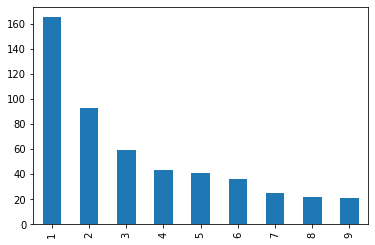

In [ ]:
df_sp500["volume"] = df_sp500["volume"].astype(str)
fd_vol = df_sp500["volume"].str.get(0)
fd_vol_count = fd_vol.value_counts()
fd_vol_count.plot.bar()

This does not agree with my prediction in Question 0. The number 1 appears much more often than any other number, expecially 9 since the bar graph is a right skewed distribution.

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

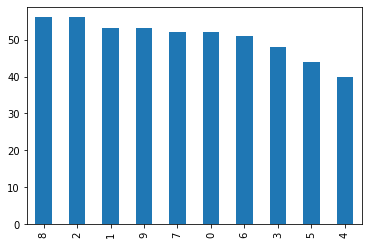

In [ ]:
ld_vol = df_sp500["volume"].str.get(-1)
ld_vol_count = ld_vol.value_counts()
ld_vol_count.plot.bar()

This bar graphs distribution is more in line with my prediction; the distribution is slightly right skewed, almost uniform. 

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

In [ ]:
df_sp500["close"] = df_sp500["close"].str[1:]

Name
AAL      53.88
AAPL    167.78
AAP     117.29
ABBV    116.34
ABC      99.29
         ...  
XYL      74.84
YUM      83.98
ZBH     128.19
ZION     54.98
ZTS      77.82
Name: close, Length: 505, dtype: object

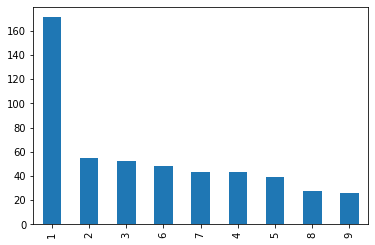

In [ ]:
fd_close = df_sp500["close"].str.get(0)
fd_close_count = fd_close.value_counts()
fd_close_count.plot.bar()

Pandas infered this variable as an object (string) because of the dollar signs in front of each float. 

This distribution is approximetly uniform, except for the digit 1. It is more similar to the last digit of the volume than the first digit of the volume since it is closer to a uniform distribution than normal. One aspect that is the same across all three distributuions is that 1 is the most common digit.